In [1]:
import sys 
sys.path.append('..')
from utils import wasserstein2
from kernels import *
from distributions import *
from kernelGAN import *
import torch, matplotlib.pyplot as plt
from celluloid import Camera
from IPython.display import HTML

device = torch.device('cpu')
%matplotlib inline
plt.rcParams.update({'font.size': 20})
%load_ext autoreload
%autoreload 2

In [25]:
# distribution params
n_true, n_gen, d = 2, 2, 1
device = torch.device('cpu')
# initializing points
X_true = torch.tensor([[1],[-1]], dtype=torch.float32)
n_true = X_true.shape[0]
X_gen_init = torch.tensor([[1.6],[1.7]], dtype=torch.float32)
p_gen = torch.randn(n_gen).softmax(-1)
p_true = torch.randn(n_true).softmax(-1)

## Gaussian Case

In [56]:
# training params
T, lr_d, lr_g, lam = 2000, 1e-1, 1e-2, 1
widths = [0.1, 0.25, 0.5, 0.75, 1]
W_dist = np.zeros((len(widths), T))
for i in range(len(widths)):
    # reinitialize generated points
    G = PointGenerator(X_gen_init, p_gen)
    # change kernel function param
    DK = Kernel('gaussian', width_param=widths[i])
    # find generated trajectories
    model = KernelGAN(G, DK, device)
    model.train(X_true, p_true, lr_d, lr_g, T, lam)
    # calculate w2 distances
    curr_w2 = wasserstein2(model.G.X_gen.detach().cpu().numpy(), X_true.detach().cpu().numpy())
    W_dist[i,:] = curr_w2

100%|██████████| 1999/1999 [00:00<00:00, 2955.45it/s]


### W2 Distance

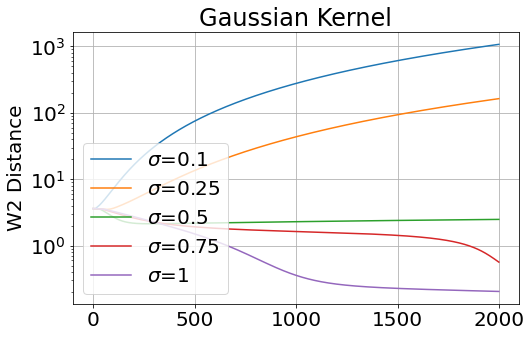

In [57]:
fig, ax = plt.subplots(figsize=(8,5))
for i, width in enumerate(widths):
    ax.semilogy(list(range(T)), W_dist[i,:], label=f'$\sigma$={width}')

plt.legend(loc='lower left')
plt.grid()
plt.ylabel('W2 Distance')
plt.title('Gaussian Kernel')
plt.show()

In [58]:
# animate the generated point trajectories
figure, axes = plt.subplots(figsize=(8,5)) 
camera = Camera(figure)

# plot initial distribution
plt.scatter(X_true, np.zeros_like(X_true),c='r', label='true', marker='*')
# plt.scatter(X_true[:,0],X_true[:,1],c='w', edgecolor='b',alpha=.5)
plt.xlim([-2,2]); plt.ylim([-2,2])
scat=plt.scatter(model.G.X_gen[0,:], np.zeros_like(model.G.X_gen[0,:]), c='g', label='gen')
plt.legend(loc='upper right')

# updating generated points
plt_interval = 50
for i, sample_idx in enumerate(range(0,T, plt_interval)):
    plt.scatter(X_true, np.zeros_like(X_true),c='r', label='true', marker='*')
    plt.scatter(model.G.X_gen[sample_idx,:], np.zeros_like(model.G.X_gen[sample_idx,:]), c='g', label='gen')
    camera.snap()

plt.close()
anim = camera.animate()
HTML(anim.to_html5_video())
# anim.save('../data/1d_gauss1_global_min.gif',
#                dpi=300,
#                savefig_kwargs={
#                    'pad_inches': 'tight'
#                }
#               )

# Laplacian Case

In [59]:
# training params
T, lr_d, lr_g, lam = 2000, 1e-1, 1e-2, 1
widths = [0.1, 0.25, 0.5, 0.75, 1]
W_dist = np.zeros((len(widths), T))
for i in range(len(widths)):
    # reinitialize generated points
    G = PointGenerator(X_gen_init, p_gen)
    # change kernel function param
    DK = Kernel('laplacian', width_param=widths[i])
    # find generated trajectories
    model = KernelGAN(G, DK, device)
    model.train(X_true, p_true, lr_d, lr_g, T, lam)
    # calculate w2 distances
    curr_w2 = wasserstein2(model.G.X_gen.detach().cpu().numpy(), X_true.detach().cpu().numpy())
    W_dist[i,:] = curr_w2

100%|██████████| 1999/1999 [00:00<00:00, 2079.84it/s]


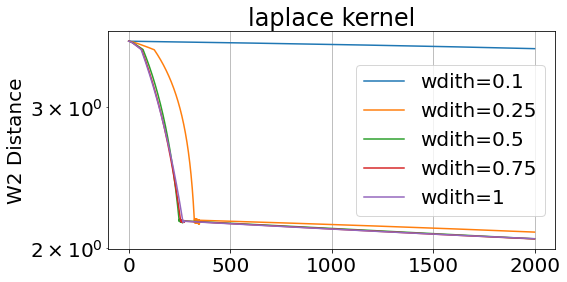

In [60]:
fig, ax = plt.subplots(figsize=(8,4))
for i, width in enumerate(widths):
    ax.semilogy(list(range(T)), W_dist[i,:], label=f'wdith={width}')

plt.legend()
plt.grid()
plt.ylabel('W2 Distance')
plt.title('laplace kernel')
plt.show()

In [61]:
# animate the generated point trajectories
figure, axes = plt.subplots(figsize=(8,5)) 
camera = Camera(figure)

# plot initial distribution
plt.scatter(X_true, np.zeros_like(X_true),c='r', label='true', marker='*')
# plt.scatter(X_true[:,0],X_true[:,1],c='w', edgecolor='b',alpha=.5)
plt.xlim([-2,2]); plt.ylim([-2,2])
scat=plt.scatter(model.G.X_gen[0,:], np.zeros_like(model.G.X_gen[0,:]), c='g', label='gen')
plt.legend(loc='upper right')

# updating generated points
plt_interval = 50
for i, sample_idx in enumerate(range(0,T, plt_interval)):
    plt.scatter(X_true, np.zeros_like(X_true),c='r', label='true', marker='*')
    plt.scatter(model.G.X_gen[sample_idx,:], np.zeros_like(model.G.X_gen[sample_idx,:]), c='g', label='gen')
    camera.snap()

plt.close()
anim = camera.animate()
HTML(anim.to_html5_video())
# anim.save('../data/1d_lap1_local_min.gif',
#                dpi=300,
#                savefig_kwargs={
#                    'pad_inches': 'tight'
#                }
#               )